In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## 1.Load Data

In [2]:
data_path = 'CC GENERAL.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (8950, 18)


## 2. Data investigation

In [3]:
# Let's see the data types and non-null values for each column
df.info()# each columns is numerical except CUST_ID 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2) # percentage of null in each column

CUST_ID                             0.00
BALANCE                             0.00
BALANCE_FREQUENCY                   0.00
PURCHASES                           0.00
ONEOFF_PURCHASES                    0.00
INSTALLMENTS_PURCHASES              0.00
CASH_ADVANCE                        0.00
PURCHASES_FREQUENCY                 0.00
ONEOFF_PURCHASES_FREQUENCY          0.00
PURCHASES_INSTALLMENTS_FREQUENCY    0.00
CASH_ADVANCE_FREQUENCY              0.00
CASH_ADVANCE_TRX                    0.00
PURCHASES_TRX                       0.00
CREDIT_LIMIT                        0.01
PAYMENTS                            0.00
MINIMUM_PAYMENTS                    3.50
PRC_FULL_PAYMENT                    0.00
TENURE                              0.00
dtype: float64

In [5]:
# This will print basic statistics for numerical columns
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [6]:
# display skewness of data 
skewness = pd.DataFrame()

skewness[['Columns','Skewness']] = df.loc[:,'CUST_ID':].skew().sort_values(ascending=False).reset_index()
skewness[(skewness['Skewness'] > 0.5)| (skewness['Skewness'] < -0.5) ] # all columns is skewed except PURCHASES_FREQUENCY


Columns   Skewness
0                   MINIMUM_PAYMENTS  13.622797
1                   ONEOFF_PURCHASES  10.045083
2                          PURCHASES   8.144269
3             INSTALLMENTS_PURCHASES   7.299120
4                           PAYMENTS   5.907620
5                   CASH_ADVANCE_TRX   5.721298
6                       CASH_ADVANCE   5.166609
7                      PURCHASES_TRX   4.630655
8                            BALANCE   2.393386
9                   PRC_FULL_PAYMENT   1.942820
10            CASH_ADVANCE_FREQUENCY   1.828686
11        ONEOFF_PURCHASES_FREQUENCY   1.535613
12                      CREDIT_LIMIT   1.522464
13  PURCHASES_INSTALLMENTS_FREQUENCY   0.509201
15                 BALANCE_FREQUENCY  -2.023266
16                            TENURE  -2.943017

#### Note:
- we would like to handle the skewness as much as possible as it will help the model to form better clusters,  For instance if we want to do clustering for anamoly detection in that case we wouldn't want to handle the outliers.

In [3]:
# feel free to investigate what you want
# we can set index by CUST_ID
df=df.set_index('CUST_ID')

In [4]:
# check duplicate rows
df.duplicated().sum()

0

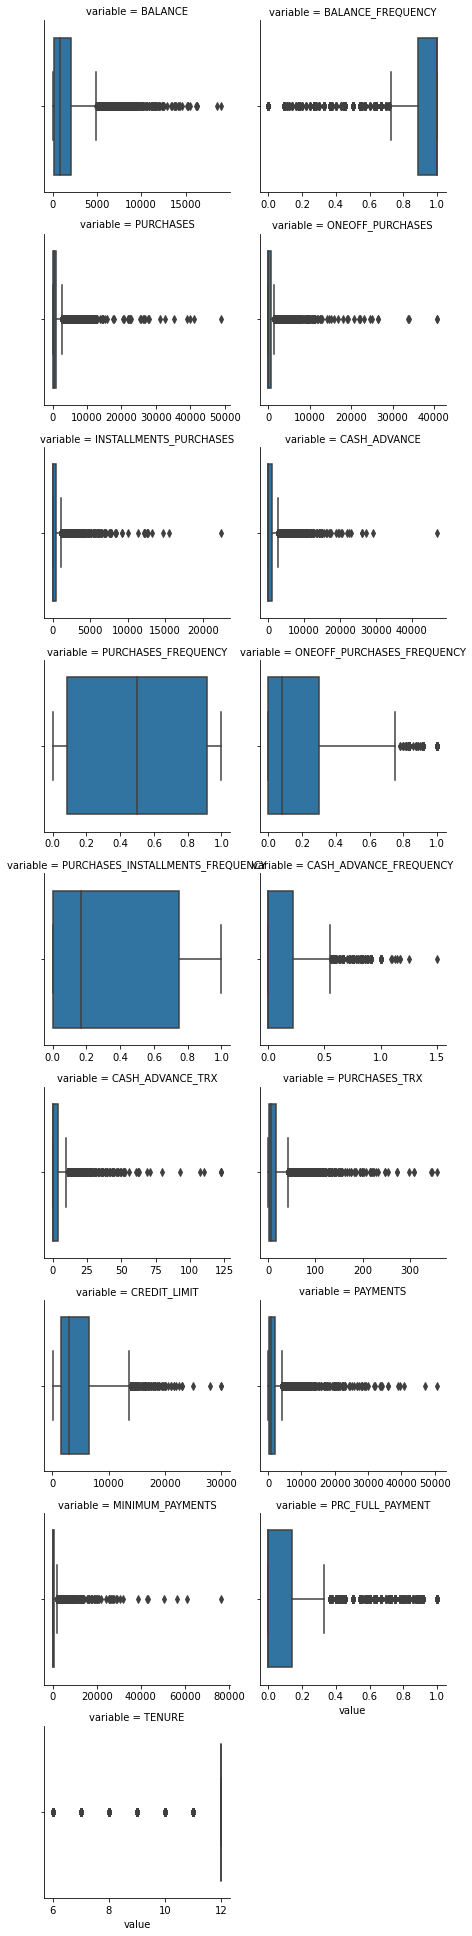

In [9]:
# plot box plot for each column
import seaborn as sns
#df.boxplot()
# plt.figure(figsize=(50,20))
# sns.boxplot(x="variable", y="value", data=pd.melt(df))
# plt.show()
f = pd.melt(df, value_vars=df.columns)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.boxplot, "value")

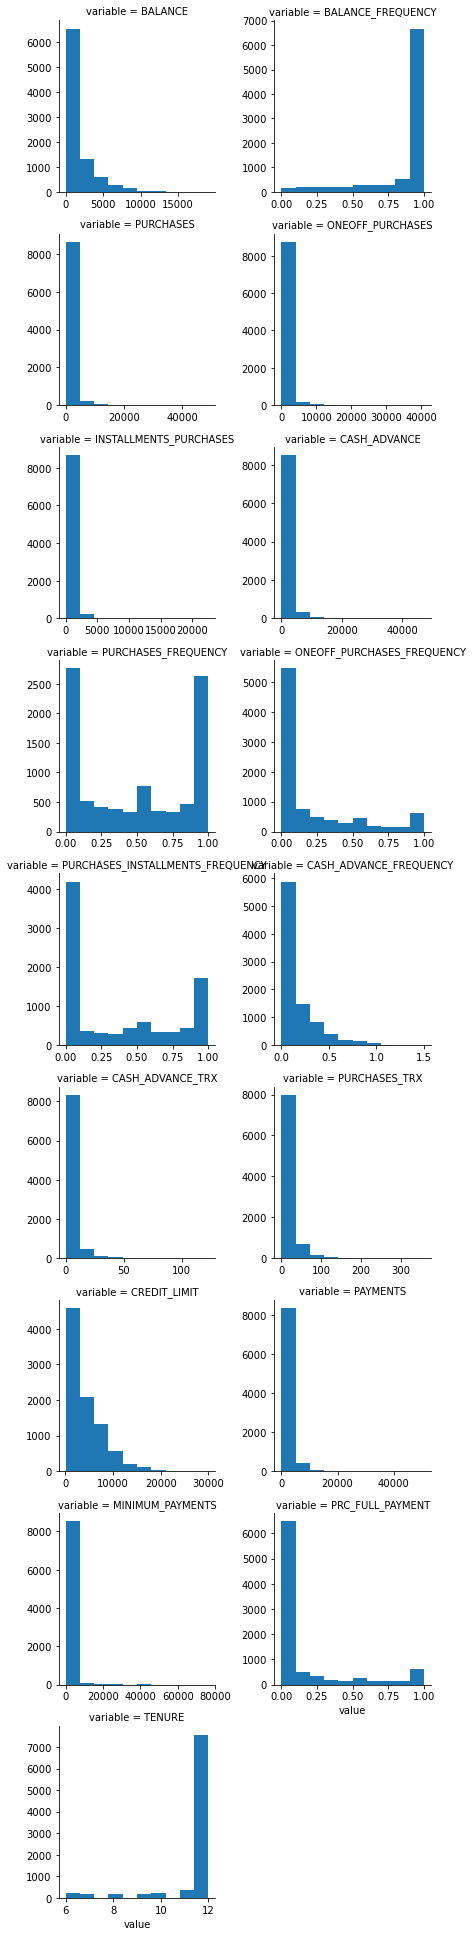

In [10]:
f = pd.melt(df, value_vars=df.columns)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(plt.hist, "value")

#### Note:
- From plots we can note that TENURE act as categorical data 

In [11]:
# convert type of TENURE
df['TENURE'].value_counts()

12    7584
11     365
10     236
6      204
8      196
7      190
9      175
Name: TENURE, dtype: int64

In [5]:
df['TENURE']=df['TENURE'].astype('category')

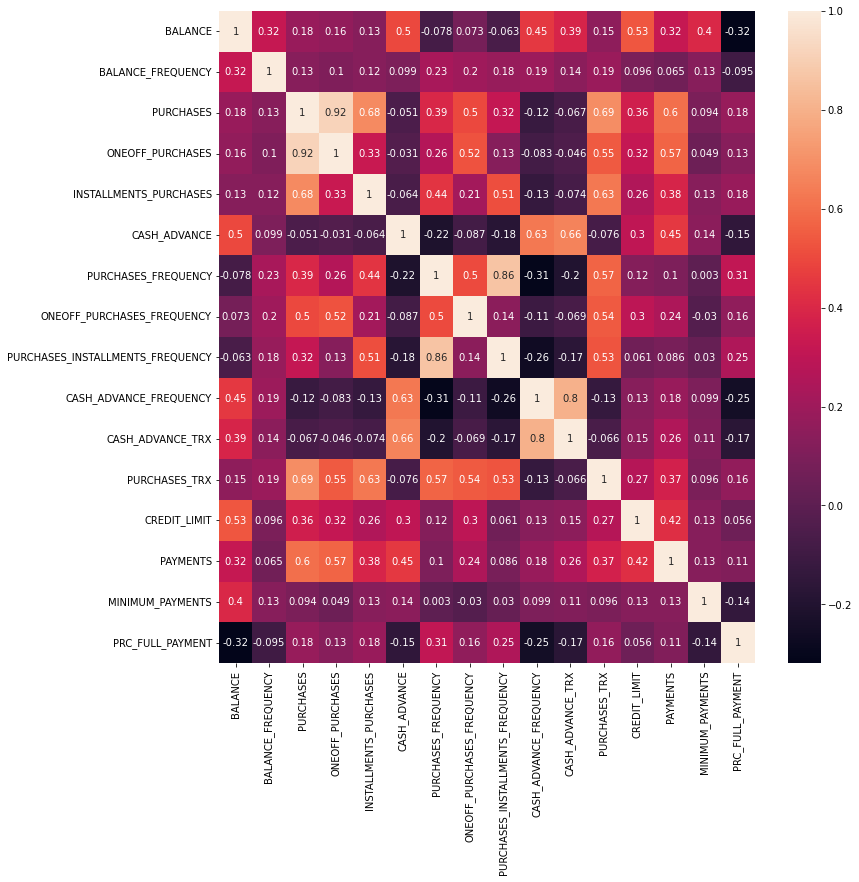

In [13]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

#### Note:
- There are some correlated features, we can use Dimensionality reduction to handle this.

## 3. Data preprocessing
##### 1-   Handle missing values        <br >

In [6]:
#make a copy for the original dataset
df_copy=df.copy()

In [7]:
#solution : fill null values in CREDIT_LIMIT , MINIMUM_PAYMENTS by median
from sklearn.impute import SimpleImputer
num_imputer = SimpleImputer(strategy="median")
num_imputer.fit(df_copy)
df_copy = pd.DataFrame(num_imputer.transform(df_copy), columns=df_copy.columns,
                          index=df_copy.index)
df_copy['TENURE']=df_copy['TENURE'].astype('category')

In [8]:
#test 
df_copy.isnull().sum().max()

0

##### 2-   Handle skewness of data        <br >
##### Note:
- we need to save version from data for anamoly detection.
- we use log(p+1) because data have values in range 0-1.

In [17]:
df_copy.to_csv('data_with_outliers.csv')

In [9]:
#solution : log(p+1)transformation for each columns
df_copy[df_copy.columns.difference(['TENURE'])] = df_copy[df_copy.columns.difference(['TENURE'])].apply(lambda m: np.log1p(m))

In [10]:
df_copy.isna().sum().max()

0

In [11]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8950 entries, C10001 to C19190
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   BALANCE                           8950 non-null   float64 
 1   BALANCE_FREQUENCY                 8950 non-null   float64 
 2   PURCHASES                         8950 non-null   float64 
 3   ONEOFF_PURCHASES                  8950 non-null   float64 
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64 
 5   CASH_ADVANCE                      8950 non-null   float64 
 6   PURCHASES_FREQUENCY               8950 non-null   float64 
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64 
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64 
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64 
 10  CASH_ADVANCE_TRX                  8950 non-null   float64 
 11  PURCHASES_TRX                     8950 non-null   floa

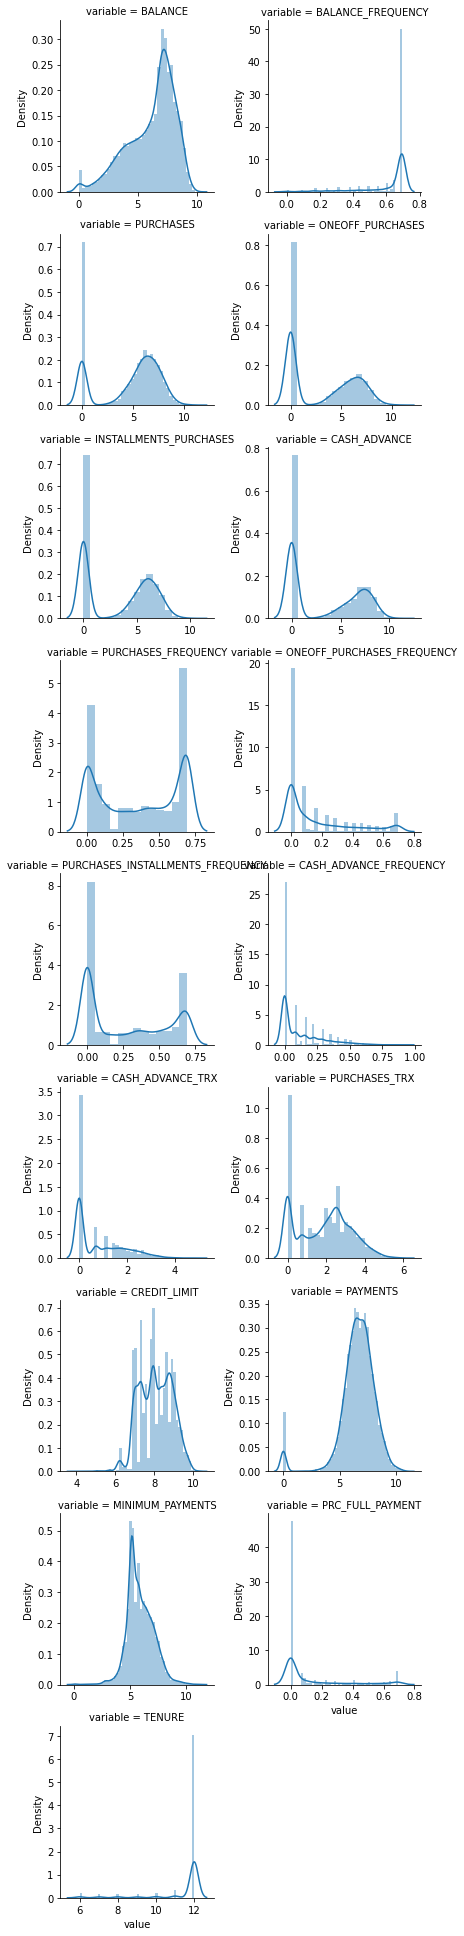

In [21]:
#test 
#df_copy.skew().sort_values(ascending=False)
f = pd.melt(df_copy, value_vars=df_copy.columns)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

## 4. Features transformation

In [12]:
# from sklearn import preprocessing
# ecoding TENURE
df_copy['TENURE']=df_copy['TENURE'].astype('float64')
from sklearn.preprocessing import StandardScaler
scale_transform = StandardScaler()
df_scaled = scale_transform.fit_transform(df_copy)

## 5. Dimensionality Reduction

In [13]:
### User defined function
def plot_explained_variance(cumsum,n_components=0):
    plt.bar(np.arange(len(cumsum)),cumsum)
    plt.axhline(y=cumsum[n_components-1], color='r', linestyle='-')
    plt.show()

shape of original data (8950, 17)
cumliative explained variance for each component [0.34462488 0.564709   0.65925359 0.73252839 0.79884599 0.85000212
 0.89185791 0.92233812 0.94751372 0.96292542]
shape of reduction data by ratio=0.95 (8950, 10)


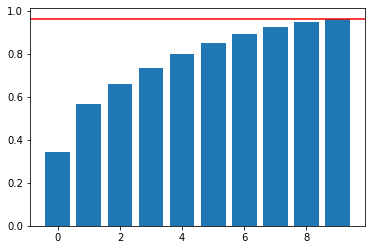

cumliative explained variance for each component [0.34462488 0.564709   0.65925359 0.73252839]
shape of reduction data by 4 component (8950, 4)


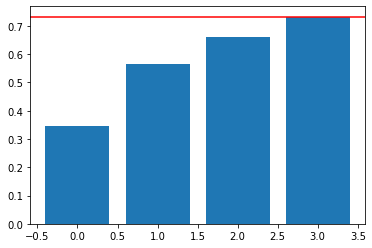

In [14]:
from sklearn.decomposition import PCA, KernelPCA
pca=PCA(n_components=10)
pca.fit(df_scaled)
PCA_df = pd.DataFrame(pca.transform(df_scaled),index=df_copy.index)
print('shape of original data', df_copy.shape)
cumsum = pca.explained_variance_ratio_.cumsum()
print('cumliative explained variance for each component',cumsum)
print('shape of reduction data by ratio=0.95', PCA_df.shape)
plot_explained_variance(cumsum,pca.n_components_)

pca_section=PCA(n_components=4)
pca_section.fit(df_scaled)
pca_section_df = pd.DataFrame(pca_section.transform(df_scaled),index=df_copy.index)
cumsum = pca_section.explained_variance_ratio_.cumsum()
print('cumliative explained variance for each component',cumsum)
print('shape of reduction data by 4 component', pca_section_df.shape)
plot_explained_variance(cumsum,pca_section.n_components_)


In [15]:
# t-sne 
# from sklearn.manifold import TSNE
# tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=300)
# tsne_results = tsne.fit_transform(df_scaled)
# tsne_df = pd.DataFrame(tsne_results, index=df_copy.index)
# plt.figure(figsize=(16,10))
# sns.scatterplot(
#     x=tsne_df[0], y=tsne_df[1]
# )

#### Note:
- data are not linearly separable, kernel PCA is probably better

In [16]:
# from mlxtend.feature_extraction import RBFKernelPCA as KPCA
# kpca = KPCA(n_components=10)
kpca = KernelPCA(n_components=10)
kpca.fit(df_scaled)
KPCA_df = pd.DataFrame(kpca.transform(df_scaled),index=df_copy.index)
print('shape of original data', df_copy.shape)
#kpca.e_vals_.cumsum()

shape of original data (8950, 17)


In [17]:
KPCA_df.shape

(8950, 10)

In [18]:
# ## plot pca data
# tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=300)
# tsne_results = tsne.fit_transform(PCA_df)
# tsne_df = pd.DataFrame(tsne_results, index=df_copy.index)
# plt.figure(figsize=(16,10))
# sns.scatterplot(
#     x=tsne_df[0], y=tsne_df[1]
# )
# plt.title('pca data')

In [19]:
# ## plot kernel pca data
# tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=300)
# tsne_results = tsne.fit_transform(KPCA_df)
# tsne_df = pd.DataFrame(tsne_results, index=df_copy.index)
# plt.figure(figsize=(16,10))
# sns.scatterplot(
#     x=tsne_df[0], y=tsne_df[1]
# )
# plt.title('kernel pca data')

### Use T-sne to visualize data in 2d

In [30]:
from sklearn.manifold import TSNE
tsne_original = TSNE(n_components=2, 
                       perplexity=30, 
                       learning_rate=1, 
                       init='pca', 
                       method='barnes_hut', 
                       n_jobs=-1, 
                       n_iter=10**4, 
                       random_state=42)
tsne_results_original = tsne_original.fit_transform(df_scaled)
tsne_df_original = pd.DataFrame(tsne_results_original, index=df_copy.index)

tsne_pca = TSNE(n_components=2, 
                       perplexity=30, 
                       learning_rate=1, 
                       init='pca', 
                       method='barnes_hut', 
                       n_jobs=-1, 
                       n_iter=10**4, 
                       random_state=42)
tsne_results_pca = tsne_pca.fit_transform(PCA_df)
tsne_df_pca = pd.DataFrame(tsne_results_pca, index=df_copy.index)

tsne_kpca = TSNE(n_components=2, 
                       perplexity=30, 
                       learning_rate=1, 
                       init='pca', 
                       method='barnes_hut', 
                       n_jobs=-1, 
                       n_iter=10**4, 
                       random_state=42)
tsne_results_kpca = tsne_kpca.fit_transform(KPCA_df)
tsne_df_kpca = pd.DataFrame(tsne_results_kpca, index=df_copy.index)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8950 samples in 0.001s...
[t-SNE] Computed neighbors for 8950 samples in 2.349s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8950
[t-SNE] Computed conditional probabilities for sample 2000 / 8950
[t-SNE] Computed conditional probabilities for sample 3000 / 8950
[t-SNE] Computed conditional probabilities for sample 4000 / 8950
[t-SNE] Computed conditional probabilities for sample 5000 / 8950
[t-SNE] Computed conditional probabilities for sample 6000 / 8950
[t-SNE] Computed conditional probabilities for sample 7000 / 8950
[t-SNE] Computed conditional probabilities for sample 8000 / 8950
[t-SNE] Computed conditional probabilities for sample 8950 / 8950
[t-SNE] Mean sigma: 0.634794
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.454445
[t-SNE] KL divergence after 300 iterations: 2.570921
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8950 samples in 0.031s...
[t-SNE] Computed neig

In [20]:
tsne_df_original = pd.read_csv('tsne_df_original_init.csv',index_col='CUST_ID')
tsne_df_pca = pd.read_csv('tsne_df_pca_imputena_init.csv',index_col='CUST_ID')
tsne_df_kpca = pd.read_csv('tsne_df_kpca_imputena_init.csv',index_col='CUST_ID')

[Text(0.5, 1.0, 'kpca data')]

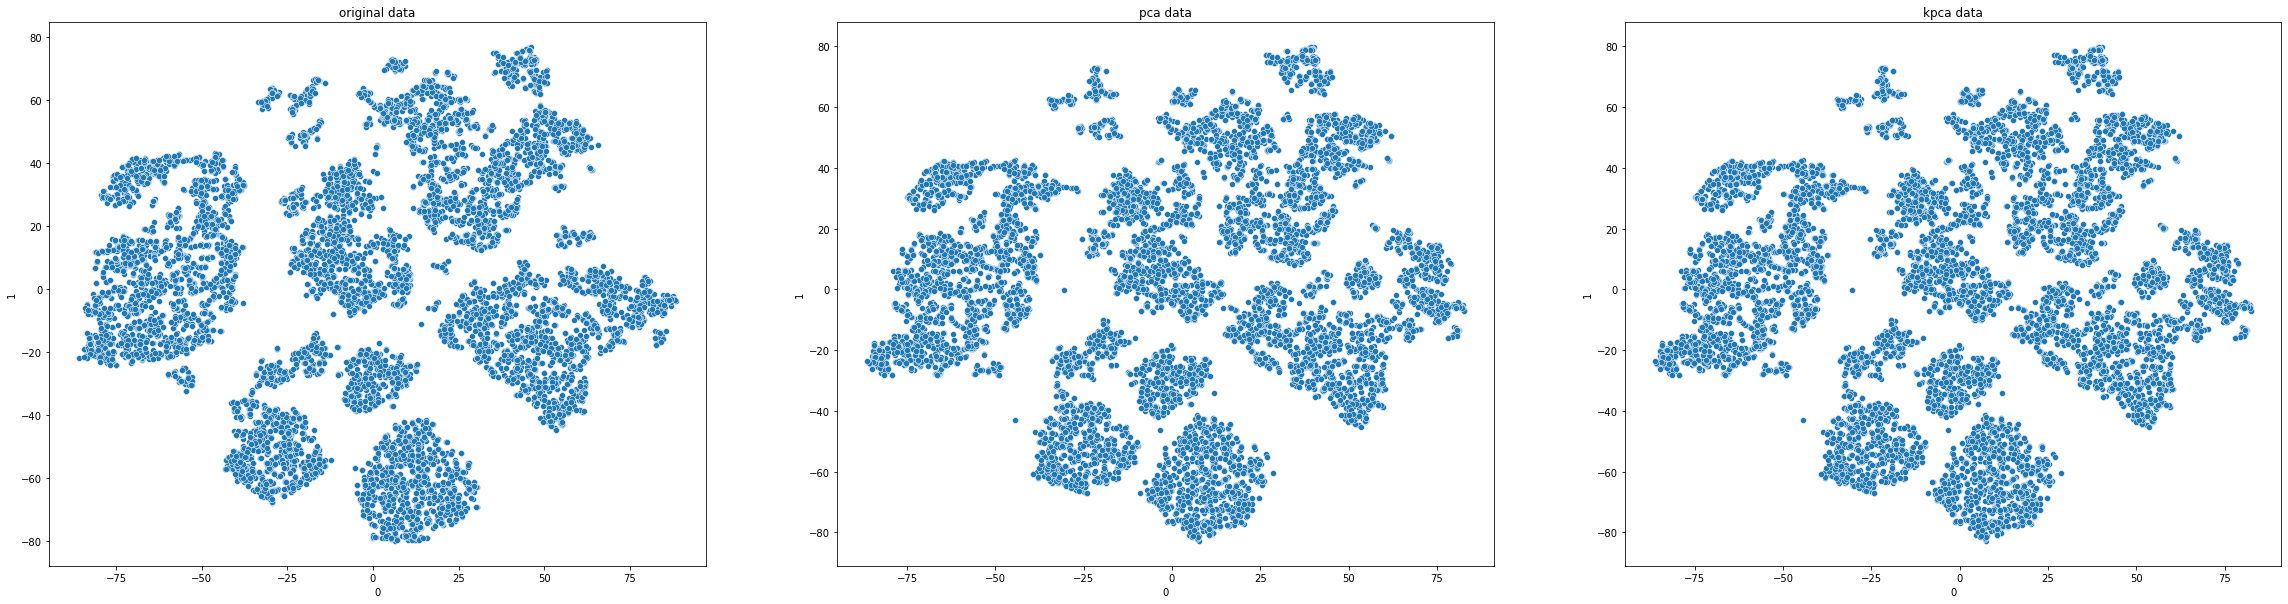

In [22]:
import seaborn as sns
fig, axs = plt.subplots(ncols=3,figsize=(40,10))
sns.scatterplot(x=tsne_df_original['0'], y=tsne_df_original['1'],ax=axs[0]).set(title='original data')
sns.scatterplot(x=tsne_df_pca['0'], y=tsne_df_pca['1'],ax=axs[1]).set(title='pca data')
sns.scatterplot(x=tsne_df_kpca['0'], y=tsne_df_kpca['1'],ax=axs[2]).set(title='kpca data')



## 6. Clustering
- Kmeans
- Hierarchical Clustering
- Agglomerative Clustering
- DBSCAN
- EM

### Note: we have
- original data in `df_scaled`
- pca data in `PCA_df`
- kernel pca data in `KPCA_df`

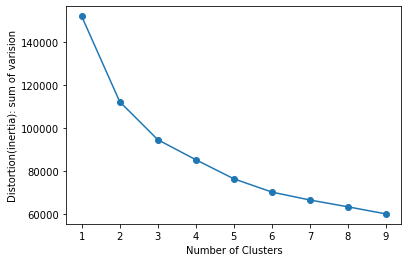

In [23]:
# apply k-means for original data
from sklearn.cluster import KMeans
inertia_list=[]
for i in range(1, 10):
    kmean2 = KMeans(n_clusters=i,random_state=42)
    kmean2.fit(df_scaled)
    inertia_list.append(kmean2.inertia_)
    
plt.plot(range(1, 10), inertia_list, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion(inertia): sum of varision')
plt.show()

In [24]:
# 4. pick the best number of clusters
no_of_clusters=[i for i in range(1, 10)]
temp=np.array([np.nan])
temp=np.append(temp,[abs(inertia_list[i+1]-inertia_list[i]) for i in range(len(inertia_list)-1)])
index_best=temp[1:].argmax()
print('the best number of clusters',no_of_clusters[index_best+1])

the best number of clusters 2


In [25]:


from sklearn.metrics import silhouette_score
kmean = KMeans(n_clusters=2, random_state=42)
kmean.fit(df_scaled)
df_scaled = pd.DataFrame(df_scaled,index=df_copy.index)
df_scaled['label_KMeans'] = kmean.labels_
print("silhouette score for original data in KMeans ",silhouette_score(df_scaled.drop('label_KMeans',axis=1), df_scaled['label_KMeans']))

kmean = KMeans(n_clusters=2, random_state=42)
kmean.fit(PCA_df)
PCA_df['label_KMeans'] = kmean.labels_
print("silhouette score for pca data in KMeans ",silhouette_score(PCA_df.drop('label_KMeans',axis=1), PCA_df['label_KMeans']))

kmean = KMeans(n_clusters=2, random_state=42)
kmean.fit(KPCA_df)
KPCA_df['label_KMeans'] = kmean.labels_
print("silhouette score for kpca data in KMeans ",silhouette_score(KPCA_df.drop('label_KMeans',axis=1), KPCA_df['label_KMeans']))


silhouette score for original data in KMeans  0.2589271406924557
silhouette score for pca data in KMeans  0.26854393362843515
silhouette score for kpca data in KMeans  0.26854393362843515


In [35]:
# df_scaled.drop('label_KMeans',axis=1,inplace=True)
# PCA_df.drop('label_KMeans',axis=1,inplace=True)
# KPCA_df.drop('label_KMeans',axis=1,inplace=True)

### Use T-sne to visualize data in 2d

In [26]:
tsne_df_original['label_KMeans']= df_scaled['label_KMeans']
tsne_df_pca['label_KMeans']=PCA_df['label_KMeans']
tsne_df_kpca['label_KMeans']=KPCA_df['label_KMeans']

[Text(0.5, 1.0, 'kpca data')]

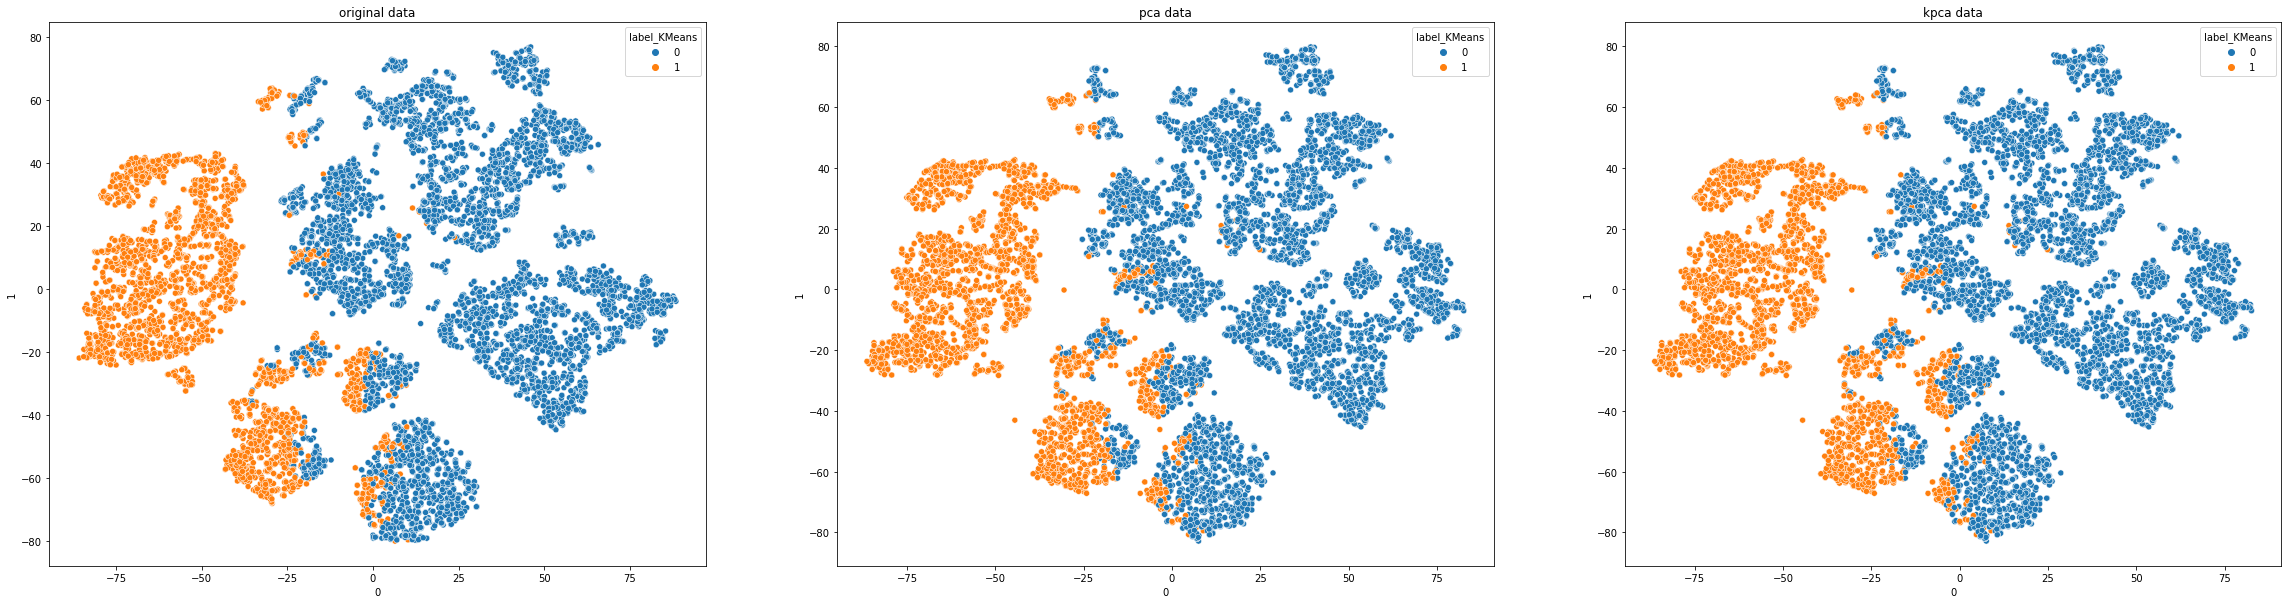

In [27]:
fig, axs = plt.subplots(ncols=3,figsize=(40,10))
sns.scatterplot(
    x=tsne_df_original['0'], y=tsne_df_original['1']
    ,hue=tsne_df_original['label_KMeans'],ax=axs[0]).set(title='original data')

sns.scatterplot(
    x=tsne_df_pca['0'], y=tsne_df_pca['1']
    ,hue=tsne_df_pca['label_KMeans'],ax=axs[1]).set(title='pca data')

sns.scatterplot(
    x=tsne_df_kpca['0'], y=tsne_df_kpca['1']
    ,hue=tsne_df_kpca['label_KMeans'],ax=axs[2]).set(title='kpca data')


#### Agglomerative and Hierarchical Clustering for data:

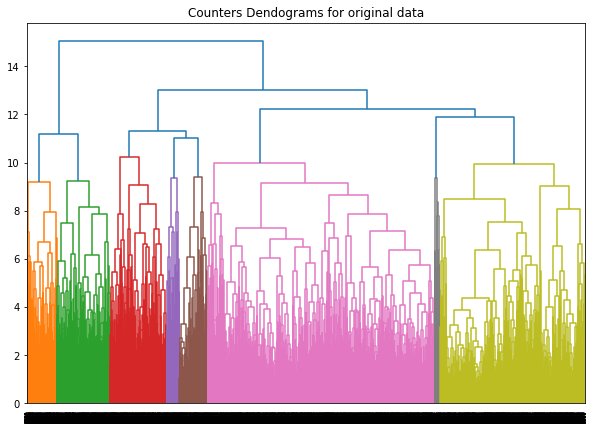

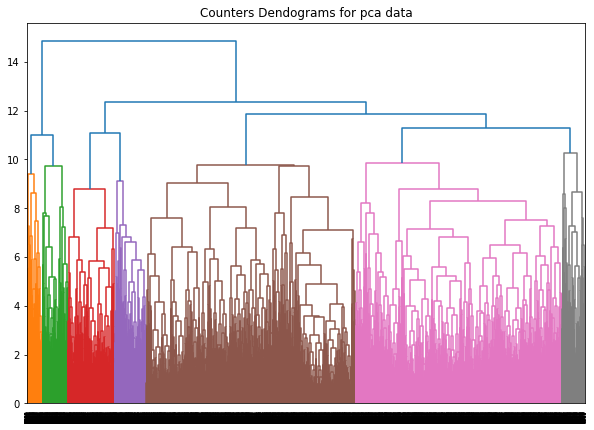

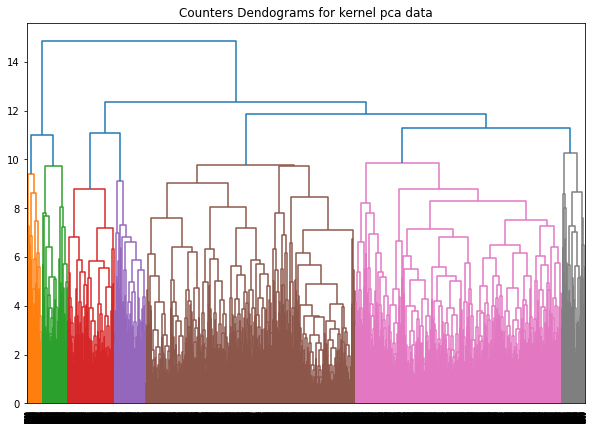

In [28]:
# apply Hierarchical Clustering using average linkage and euclidean distance
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms for original data")
dend = shc.dendrogram(shc.linkage(y=df_scaled.drop('label_KMeans',axis=1) , method='complete',metric='euclidean'))
plt.show()

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms for pca data")
dend = shc.dendrogram(shc.linkage(y=PCA_df.drop('label_KMeans',axis=1) , method='complete',metric='euclidean'))
plt.show()

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms for kernel pca data")
dend = shc.dendrogram(shc.linkage(y=KPCA_df.drop('label_KMeans',axis=1) , method='complete',metric='euclidean'))
plt.show()

In [29]:
#Agglomerative Clustering for original data
from sklearn.cluster import AgglomerativeClustering

hier_cluster = AgglomerativeClustering(n_clusters=7,linkage='complete')
hier_cluster.fit(df_scaled.drop('label_KMeans',axis=1))
df_scaled['label_Agg'] = hier_cluster.labels_
print("silhouette score for original data in KMeans ",silhouette_score(df_scaled.drop(['label_KMeans','label_Agg'],axis=1), df_scaled['label_Agg']))

hier_cluster = AgglomerativeClustering(n_clusters=7,linkage='complete')
hier_cluster.fit(PCA_df.drop('label_KMeans',axis=1))
PCA_df['label_Agg'] = hier_cluster.labels_
print("silhouette score for pca data in KMeans ",silhouette_score(PCA_df.drop(['label_KMeans','label_Agg'],axis=1), PCA_df['label_Agg']))

hier_cluster = AgglomerativeClustering(n_clusters=7,linkage='complete')
hier_cluster.fit(KPCA_df.drop('label_KMeans',axis=1))
KPCA_df['label_Agg'] = hier_cluster.labels_
print("silhouette score for kpca data in KMeans ",silhouette_score(KPCA_df.drop(['label_KMeans','label_Agg'],axis=1), KPCA_df['label_Agg']))


silhouette score for original data in KMeans  0.1437596871414115
silhouette score for pca data in KMeans  0.13967766203406207
silhouette score for kpca data in KMeans  0.13967766203406212


In [30]:
# df_scaled.drop('label_Agg',axis=1,inplace=True)
# PCA_df.drop('label_Agg',axis=1,inplace=True)
# KPCA_df.drop('label_Agg',axis=1,inplace=True)

### Use T-sne to visualize data in 2d

[Text(0.5, 1.0, 'kpca data')]

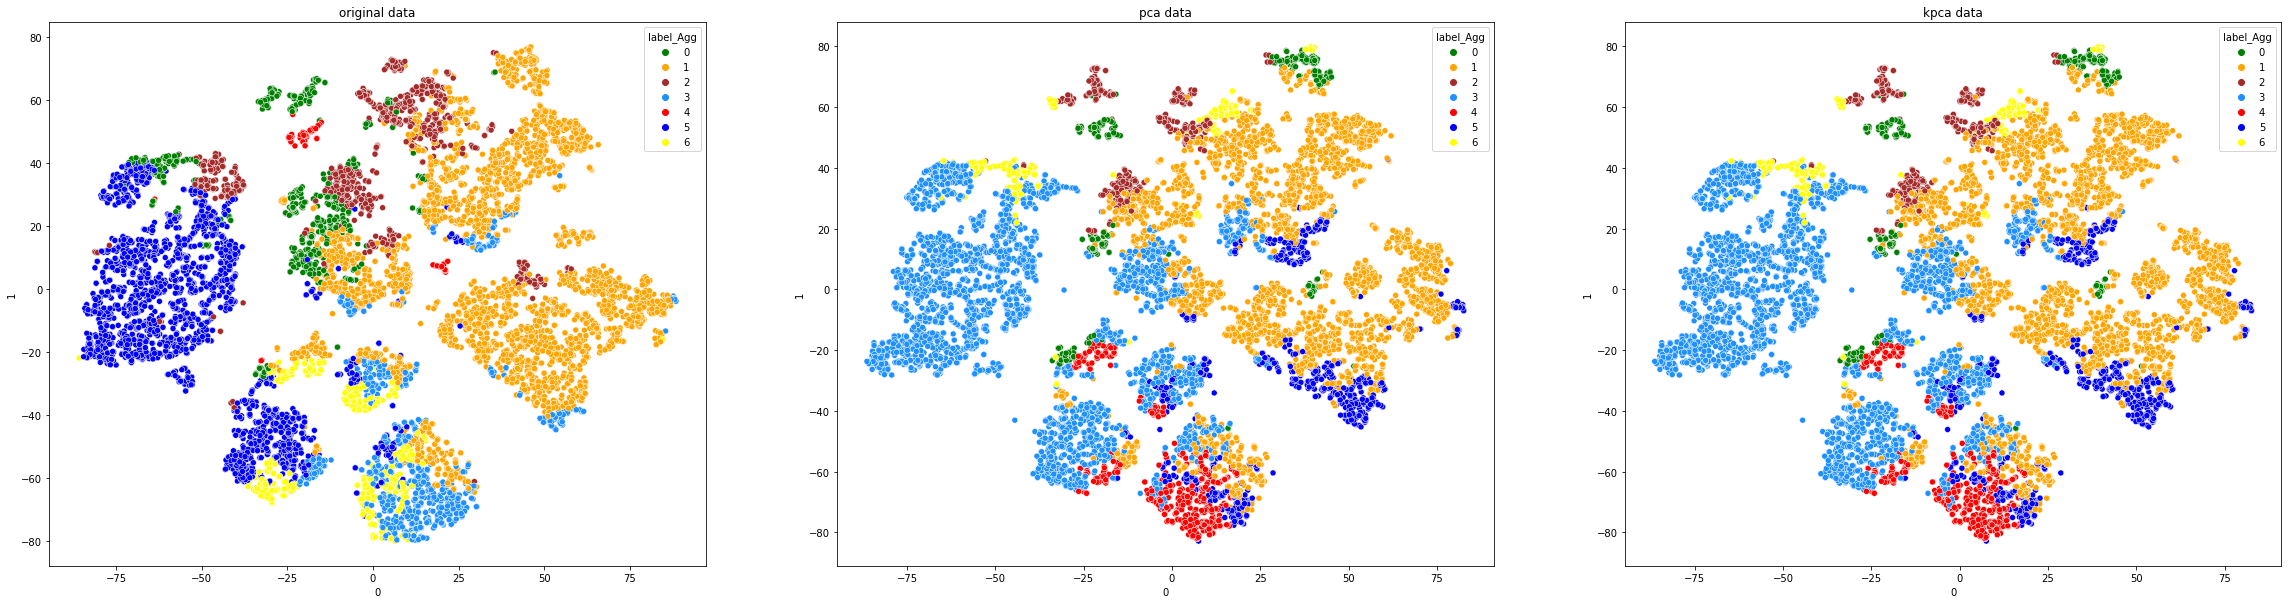

In [31]:
tsne_df_original['label_Agg']= df_scaled['label_Agg']
tsne_df_pca['label_Agg']=PCA_df['label_Agg']
tsne_df_kpca['label_Agg']=KPCA_df['label_Agg']

color_map = ["#9b59b6", "#e74c3c", "#34495e", "#2ecc71"]
fig, axs = plt.subplots(ncols=3,figsize=(40,10))

sns.scatterplot(
    x=tsne_df_original['0'], y=tsne_df_original['1']
    ,hue=tsne_df_original['label_Agg'],ax=axs[0],palette=['green','orange','brown','dodgerblue',"red",'blue','yellow']).set(title='original data')

sns.scatterplot(
    x=tsne_df_pca['0'], y=tsne_df_pca['1']
    ,hue=tsne_df_pca['label_Agg'],ax=axs[1],palette=['green','orange','brown','dodgerblue',"red",'blue','yellow']).set(title='pca data')

sns.scatterplot(
    x=tsne_df_kpca['0'], y=tsne_df_kpca['1']
    ,hue=tsne_df_kpca['label_Agg'],ax=axs[2],palette=['green','orange','brown','dodgerblue',"red",'blue','yellow']).set(title='kpca data')


In [42]:
# df_scaled.drop('label_KMeans',axis=1)
# PCA_df.drop('label_KMeans',axis=1)
# KPCA_df.drop('label_KMeans',axis=1,inplace=True)

#### DBCAN Clustering for data:

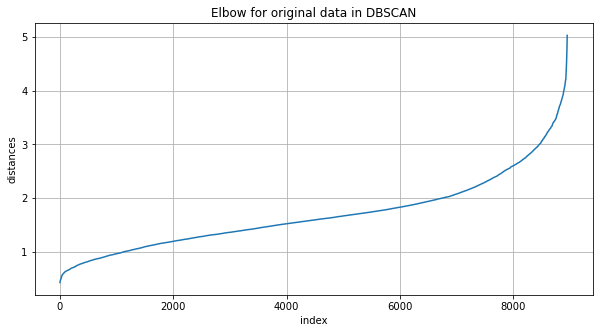

In [32]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
db1 = DBSCAN(eps = 2.5, min_samples = 34).fit(df_scaled.drop(['label_KMeans','label_Agg'],axis=1))
df_label = pd.DataFrame(index=df_copy.index)
df_label['label'] = db1.labels_

# we ask for mins + 1 nearest, because the data point it self (distance = 0) is included
mins = 34
nn = NearestNeighbors(mins + 1)

nn.fit(df_scaled.drop(['label_KMeans','label_Agg'],axis=1))

distances, neighbors = nn.kneighbors(df_scaled.drop(['label_KMeans','label_Agg'],axis=1))

# sort the distances
distances = np.sort(distances[:, mins], axis = 0)
plt.figure(figsize=(10,5))
plt.plot(distances)
plt.xlabel('index')
plt.ylabel('distances')
plt.grid(True)
plt.title("Elbow for original data in DBSCAN")
plt.show()

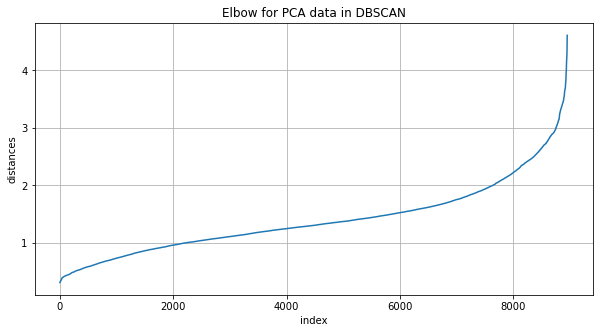

In [35]:
db1 = DBSCAN(eps = 2.2, min_samples = 22).fit(PCA_df.drop(['label_KMeans','label_Agg'],axis=1))
df_label['label_pca'] = db1.labels_

# we ask for mins + 1 nearest, because the data point it self (distance = 0) is included
mins = 22
nn = NearestNeighbors(mins + 1)

nn.fit(PCA_df.drop(['label_KMeans','label_Agg'],axis=1))

distances, neighbors = nn.kneighbors(PCA_df.drop(['label_KMeans','label_Agg'],axis=1))

# sort the distances
distances = np.sort(distances[:, mins], axis = 0)
plt.figure(figsize=(10,5))
plt.plot(distances)
plt.xlabel('index')
plt.ylabel('distances')
plt.grid(True)
plt.title("Elbow for PCA data in DBSCAN")
plt.show()

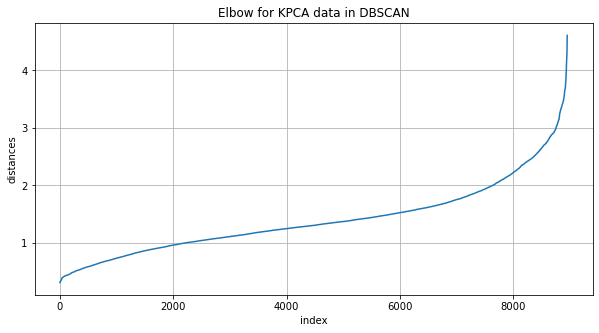

In [37]:
db1 = DBSCAN(eps = 2.2, min_samples = 22).fit(KPCA_df.drop(['label_KMeans','label_Agg'],axis=1))
df_label['label_kpca'] = db1.labels_

# we ask for mins + 1 nearest, because the data point it self (distance = 0) is included
mins = 22
nn = NearestNeighbors(mins + 1)

nn.fit(KPCA_df.drop(['label_KMeans','label_Agg'],axis=1))

distances, neighbors = nn.kneighbors(KPCA_df.drop(['label_KMeans','label_Agg'],axis=1))

# sort the distances
distances = np.sort(distances[:, mins], axis = 0)
plt.figure(figsize=(10,5))
plt.plot(distances)
plt.xlabel('index')
plt.ylabel('distances')
plt.grid(True)
plt.title("Elbow for KPCA data in DBSCAN")
plt.show()

In [38]:
print("silhouette score for original data in KMeans ",silhouette_score(df_scaled.drop(['label_KMeans','label_Agg'],axis=1), df_label['label']))
print("silhouette score for pca data in KMeans ",silhouette_score(PCA_df.drop(['label_KMeans','label_Agg'],axis=1), df_label['label_pca']))
print("silhouette score for kpca data in KMeans ",silhouette_score(KPCA_df.drop(['label_KMeans','label_Agg'],axis=1), df_label['label_kpca']))


silhouette score for original data in KMeans  0.21051533796449576
silhouette score for pca data in KMeans  0.21558263789499682
silhouette score for kpca data in KMeans  0.21558263789499682


In [39]:
df_scaled.drop(['label_KMeans','label_Agg'],axis=1,inplace=True)
PCA_df.drop(['label_KMeans','label_Agg'],axis=1,inplace=True)
KPCA_df.drop(['label_KMeans','label_Agg'],axis=1,inplace=True)

### Use T-sne to visualize data in 2d

In [40]:
tsne_df_original['label_dbscan']= df_label['label']
tsne_df_pca['label_dbscan']=df_label['label_pca']
tsne_df_kpca['label_dbscan']=df_label['label_kpca']

In [41]:
print('number of clusters for data',len(tsne_df_original['label_dbscan'].unique()))
print('number of clusters for pca data',len(tsne_df_pca['label_dbscan'].unique()))
print('number of clusters for kpca data',len(tsne_df_kpca['label_dbscan'].unique()))

number of clusters for data 3
number of clusters for pca data 2
number of clusters for kpca data 2


[Text(0.5, 1.0, 'kpca data')]

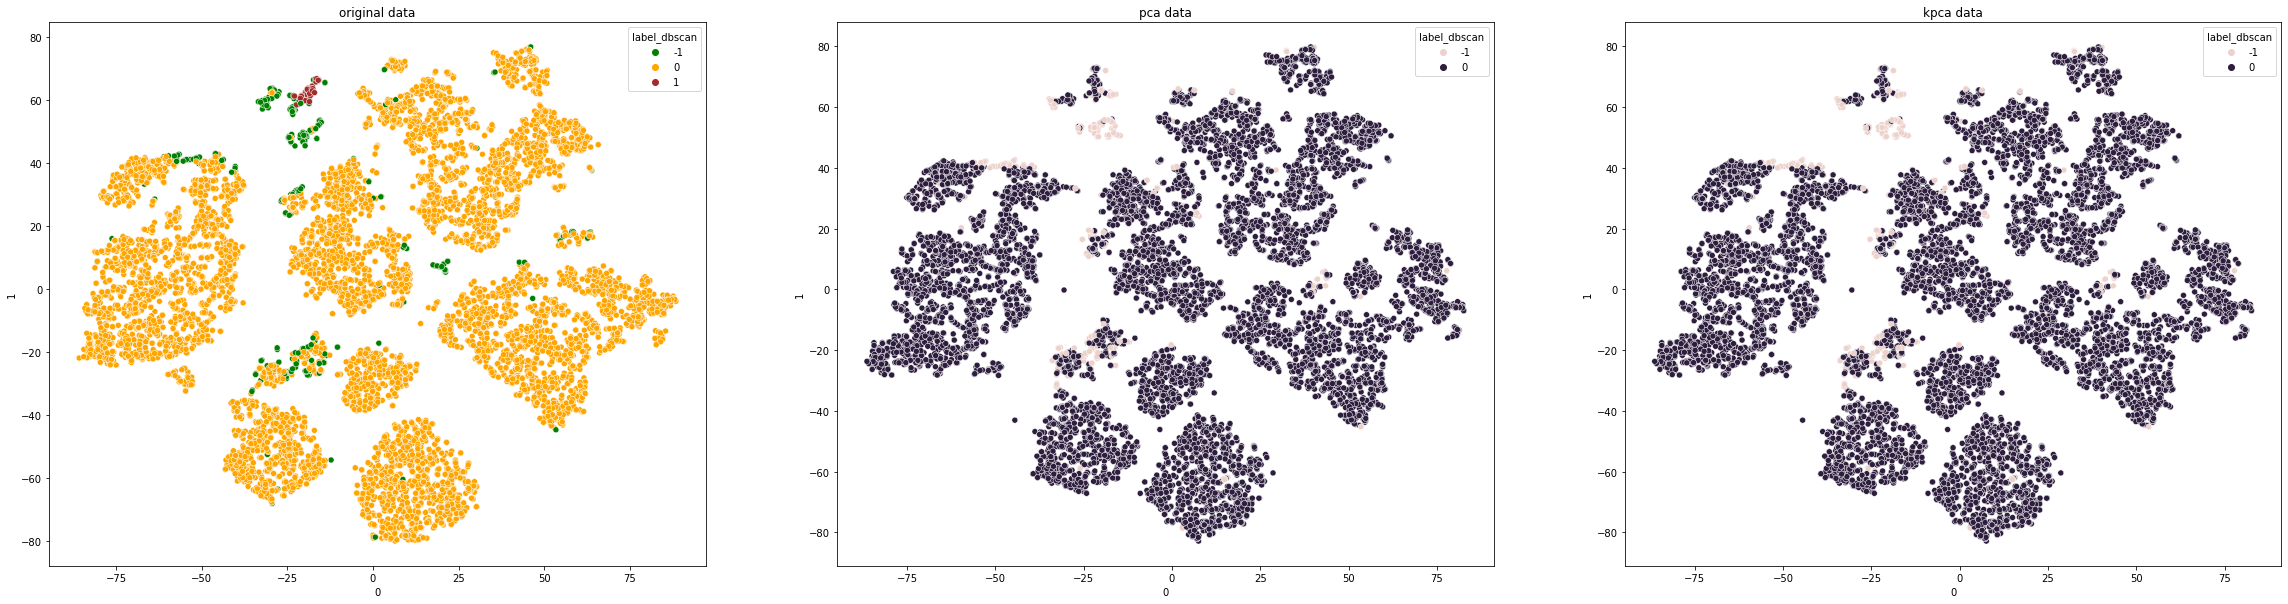

In [42]:
fig, axs = plt.subplots(ncols=3,figsize=(40,10))

sns.scatterplot(
    x=tsne_df_original['0'], y=tsne_df_original['1']
    ,hue=tsne_df_original['label_dbscan'],ax=axs[0],palette=['green','orange','brown']).set(title='original data')

sns.scatterplot(
    x=tsne_df_pca['0'], y=tsne_df_pca['1']
    ,hue=tsne_df_pca['label_dbscan'],ax=axs[1]).set(title='pca data')

sns.scatterplot(
    x=tsne_df_kpca['0'], y=tsne_df_kpca['1']
    ,hue=tsne_df_kpca['label_dbscan'],ax=axs[2]).set(title='kpca data')


#### EM  Clustering for data:

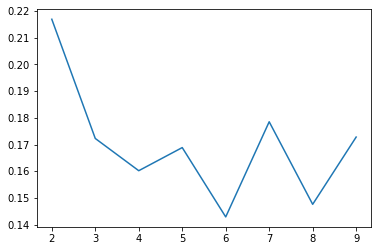

In [43]:
from sklearn.mixture import GaussianMixture

range_n_cluster = list(range(2,10))
silhoutte_score = []
best_cluster_model = None 

for n_clusters in range_n_cluster:
    
    gmm = GaussianMixture(n_components=n_clusters)
    gmm_label = gmm.fit_predict(df_scaled)
    # compute silhouette score and append to list
    silhouette_avg = silhouette_score(df_scaled, gmm_label)
    silhoutte_score += [silhouette_avg]
    # check if silhouette score greater than any score in lisst , select cluster as best clustering 
    if silhouette_avg >= np.max(silhoutte_score):
        best_cluster_model = gmm

plt.plot(range_n_cluster, silhoutte_score)

In [44]:
gmm = GaussianMixture(n_components=2)
gmm_label =pd.DataFrame(index=df_copy.index)
gmm_label['label'] = gmm.fit_predict(df_scaled)

gmm = GaussianMixture(n_components=2)
gmm_label['label_PCA'] = gmm.fit_predict(PCA_df)

gmm = GaussianMixture(n_components=2)
gmm_label['label_KPCA'] = gmm.fit_predict(KPCA_df)

In [45]:
tsne_df_original['label_em']= gmm_label['label']
tsne_df_pca['label_em']=gmm_label['label_PCA']
tsne_df_kpca['label_em']=gmm_label['label_KPCA']

In [46]:
tsne_df_kpca['label_em'].value_counts()

1    6057
0    2893
Name: label_em, dtype: int64

[Text(0.5, 1.0, 'kpca data')]

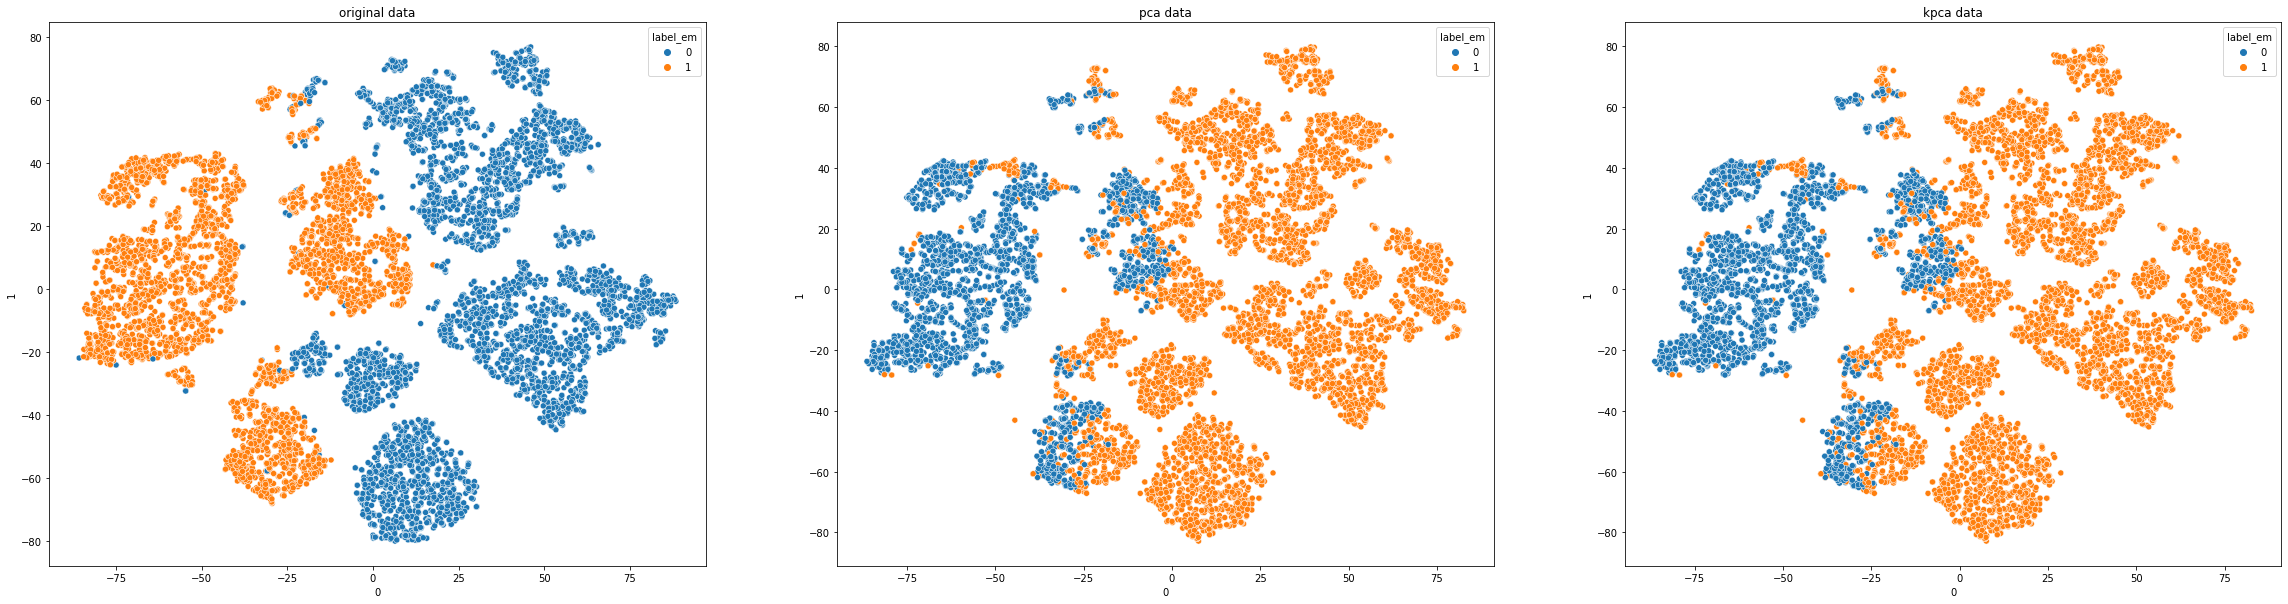

In [48]:
fig, axs = plt.subplots(ncols=3,figsize=(40,10))

sns.scatterplot(
    x=tsne_df_original['0'], y=tsne_df_original['1']
    ,hue=tsne_df_original['label_em'],ax=axs[0]).set(title='original data')

sns.scatterplot(
    x=tsne_df_pca['0'], y=tsne_df_pca['1']
    ,hue=tsne_df_pca['label_em'],ax=axs[1]).set(title='pca data')

sns.scatterplot(
    x=tsne_df_kpca['0'], y=tsne_df_kpca['1']
    ,hue=tsne_df_kpca['label_em'],ax=axs[2]).set(title='kpca data')
